In [1]:
from data_harvesting import Harvesting
from cnn import CNN
# from iireinforcement import Agent
# from iitrading_strategy import Strategy
% matplotlib inline

/home/apurvnit/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# sample harvested data
hr = Harvesting()
df = hr.load_data()
print(len(df))
df.head()

371635


,date,open,high,low,close,volume
0,20170102 020000,1.05155,1.05197,1.05155,1.05190,0
1,20170102 020100,1.05209,1.05209,1.05177,1.05179,0
2,20170102 020200,1.05177,1.05198,1.05177,1.05178,0
3,20170102 020300,1.05188,1.05200,1.05188,1.05200,0
4,20170102 020400,1.05196,1.05204,1.05196,1.05203,0


In [3]:
X, Y = hr.split_into_chunks(100,1,5)
X_train, X_test, Y_train, Y_test = Harvesting.data_split(X, Y)

total chunks  74307
each chunk contains 100
saving to data/data1.csv


### Define model

In [4]:
input_shape=X_train[0].shape
output_shape=1
cnn_model = CNN(layers=[
            {
                'type': 'sepconv1D',
                'args': {
                    'filters': 32,
                    'kernel_size': 5,
                    'activation': 'relu',
                    'input_shape': input_shape
                }
            },
            {
                'type': 'maxpool1D',
                'args': {
                    'pool_size': 2
                }
            },
            {
                'type': 'conv1D',
                'args': {
                    'filters': 128,
                    'kernel_size': 3,
                    'activation': 'relu'
                }
            },
            {
                'type': 'maxpool1D',
                'args': {
                    'pool_size': 2
                }
            },
            {
                'type': 'dropout',
                'args': {
                    'ratio': 0.15
                }
            },
            {
                'type': 'flatten',
                'args': None
            },
            {
                'type': 'dense',
                'args': {
                    'output': 250
                }
            },
            {
                'type': 'dropout',
                'args': {
                    'ratio': 0.2
                }
            },
            {
                'type': 'activation',
                'args': {
                    'function': 'relu'
                }
            },
            {
                'type': 'dense',
                'args': {
                    'output': 250
                }
            },
            {
                'type': 'dense',
                'args': {
                    'output': 125
                }
            },
            {
                'type': 'dense',
                'args': {
                    'output': 32
                }
            },

            {
                'type': 'dense',
                'args': {
                    'output': output_shape
                }
            },
            {
                'type': 'activation',
                'args': {
                    'function': 'linear'
                }
            },
        ])
cnn_model.build_model()
# model.compile_model()

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv1d_1 (Separabl (None, 96, 32)            69        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 48, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 46, 128)           12416     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 23, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 128)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2944)              0         
___________________________________________________________

In [5]:
cnn_model.compile_model()

In [6]:
history = cnn_model.fit_model(X_train, Y_train, epochs=10,batch_size=32)

Train on 50157 samples, validate on 16719 samples
Epoch 1/10
50157/50157 [==============================] - 23s 462us/step - loss: 0.0031 - mean_absolute_error: 0.0417 - val_loss: 3.4955e-04 - val_mean_absolute_error: 0.0141
Epoch 2/10
50157/50157 [==============================] - 23s 461us/step - loss: 0.0031 - mean_absolute_error: 0.0416 - val_loss: 3.7910e-04 - val_mean_absolute_error: 0.0150
Epoch 3/10
50157/50157 [==============================] - 23s 464us/step - loss: 0.0031 - mean_absolute_error: 0.0416 - val_loss: 3.6468e-04 - val_mean_absolute_error: 0.0143
Epoch 4/10
50157/50157 [==============================] - 23s 465us/step - loss: 0.0030 - mean_absolute_error: 0.0414 - val_loss: 2.8912e-04 - val_mean_absolute_error: 0.0120
Epoch 5/10
50157/50157 [==============================] - 23s 468us/step - loss: 0.0031 - mean_absolute_error: 0.0416 - val_loss: 2.9189e-04 - val_mean_absolute_error: 0.0117
Epoch 6/10
50157/50157 [==============================] - 23s 466us/step - 

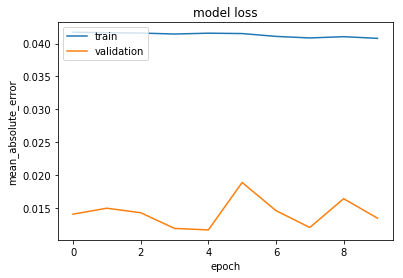

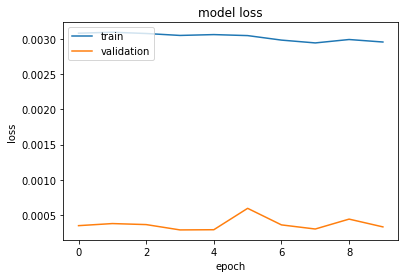

In [7]:
cnn_model.visualise_history()

7431/7431 [==============================] - 1s 96us/step
model loss - 0.000324 
 model mean absolute error - 0.013576


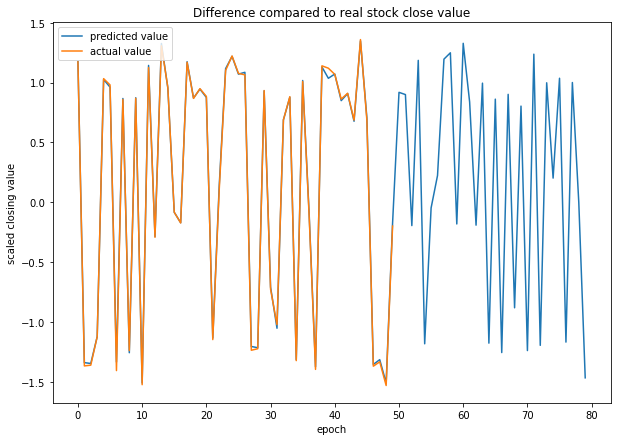

In [8]:
cnn_model.evaluate(X_test, Y_test)

In [9]:
cnn_model.save_model()

### As we can see the above graph is not totally accurate but it is able to learn the trend i.e. the stock is gonna go up or down . 

In [10]:
state_shape = (30, 1)
strategy = Strategy(state_shape, start_cash=10000, filename='DAT_ASCII_EURUSD_M1_2014.csv')

NameError: name 'Strategy' is not defined

In [ ]:
import os
os.listdir('data')